## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 8 : CNN </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [1]:
# Run this code when you restart the machine
# Fill in with YOUR name and NIM
import datetime
import uuid

myName = "Ragil Muhamad Ramadhan"
myNIM = "58511"

In [2]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Ragil Muhamad Ramadhan
NIM: 		58511
Start: 		2023-11-01 20:59:53.208185
Device ID: 	ee4b16be-78be-11ee-a43c-ee832a06063c


# ---

### Dataset yang dipakai:

1. [Fashion MNIST] – sumber : [https://www.kaggle.com/datasets/zalando-research/fashionmnist]
2. [Sign Language MNIST] – sumber : [https://www.kaggle.com/datasets/datamunge/sign-language-mnist]

---

### Hasil kerja

# Importing system library

In [13]:
import sys
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import sklearn as sk
import numpy as np

In [2]:
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print(f"Python Version: {sys.version}")
print(f"Pandas Version: {pd.__version__}")
print(f"Scikit-Learn Version: {sk.__version__}")

Tensor Flow Version: 2.14.0


AttributeError: module 'tensorflow.keras' has no attribute '__version__'

In [10]:
import os
for dirname, _, filenames in os.walk('/fashion'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [41]:
# Import Libraries
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

df_train = pd.read_csv("./fashion/fashion-mnist_train.csv")
X_train = df_train.iloc[:,1:]
y_train = df_train['label']

df_test = pd.read_csv("./fashion/fashion-mnist_test.csv")
X_test = df_test.iloc[:,1:]
y_test = df_test['label']

print(f"x_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"x_test.shape: {X_test.shape}")
print(f"y_test.shape: {y_test.shape}")
print(f"df_train.shape: {df_train.shape}")

x_train.shape: (60000, 784)
y_train.shape: (60000,)
x_test.shape: (10000, 784)
y_test.shape: (10000,)
df_train.shape: (60000, 785)


In [42]:
X_train = X_train.to_numpy()
X_train = X_train.reshape((60000, 28, 28))
X_test = X_test.to_numpy()
X_train.shape

(60000, 28, 28)

In [43]:
# Display the digits
from IPython.display import display

# Display as text
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 5)

print("Shape for dataset: {}".format(X_train.shape))
print("Labels: {}".format(y_train))

# Single MNIST digit
single = X_train[0]
print("Shape for single: {}".format(single.shape))

pd.DataFrame(single.reshape(28, 28))

Shape for dataset: (60000, 28, 28)
Labels: 0        2
1        9
        ..
59998    8
59999    7
Name: label, Length: 60000, dtype: int64
Shape for single: (28, 28)


,0,1,2,3,4,5,6,...,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0


In [73]:
np.max(y_train2) 

24

Image for digit: 6


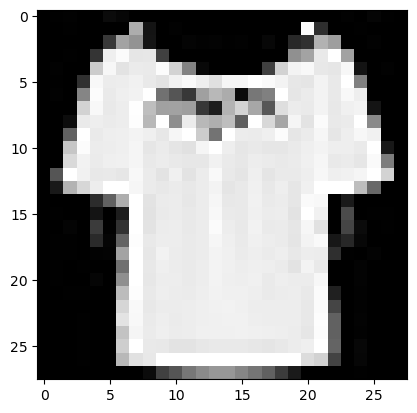

In [44]:
# Display as image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
digit = 90 # Change to choose new digit
a = X_train[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image for digit: {}".format(y_train[digit]))

<Figure size 640x480 with 0 Axes>

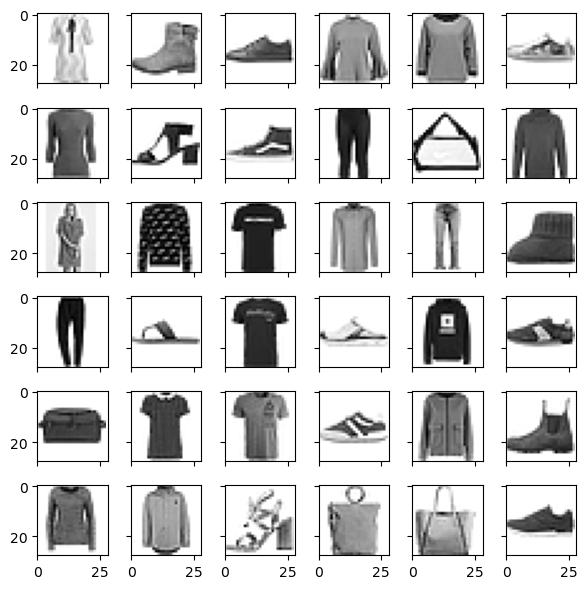

In [45]:
import random

ROWS = 6
random_indices = random.sample(range(X_train.shape[0]), ROWS*ROWS)

sample_digits = X_train[random_indices, :]

plt.clf()

fig, axes = plt.subplots(ROWS, ROWS, figsize=(ROWS, ROWS), sharex=True, sharey=True)

for i in range(ROWS*ROWS):
    subplot_row = i // ROWS
    subplot_col = i % ROWS
    ax = axes[subplot_row, subplot_col]

    plottable_image = np.reshape(sample_digits[i, :], (28, 28))
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_xbound([0, 28])
    
plt.tight_layout()
plt.show()

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
  X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
  X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize data
X_train /= 255
X_test /= 255

print(f"X_train.shape: {X_train.shape}")
print("Training samples {}".format(X_train.shape[0]))
print("Test samples {}".format(X_test.shape[0]))

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

X_train.shape: (60000, 28, 28, 1)
Training samples 60000
Test samples 10000


In [47]:
import time

start_time = time.time()

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

elapsed = time.time() - start_time
print(f"Elapsed time: {elapsed} seconds")

Epoch 1/12
469/469 - 46s - loss: 0.5417 - accuracy: 0.8077 - val_loss: 0.3199 - val_accuracy: 0.8857 - 46s/epoch - 99ms/step
Epoch 2/12
469/469 - 52s - loss: 0.3537 - accuracy: 0.8747 - val_loss: 0.2668 - val_accuracy: 0.9025 - 52s/epoch - 110ms/step
Epoch 3/12
469/469 - 48s - loss: 0.3005 - accuracy: 0.8941 - val_loss: 0.2396 - val_accuracy: 0.9117 - 48s/epoch - 103ms/step
Epoch 4/12
469/469 - 48s - loss: 0.2688 - accuracy: 0.9032 - val_loss: 0.2253 - val_accuracy: 0.9153 - 48s/epoch - 103ms/step
Epoch 5/12
469/469 - 64s - loss: 0.2460 - accuracy: 0.9114 - val_loss: 0.2194 - val_accuracy: 0.9199 - 64s/epoch - 135ms/step
Epoch 6/12
469/469 - 53s - loss: 0.2279 - accuracy: 0.9169 - val_loss: 0.2150 - val_accuracy: 0.9192 - 53s/epoch - 114ms/step
Epoch 7/12
469/469 - 54s - loss: 0.2078 - accuracy: 0.9233 - val_loss: 0.2071 - val_accuracy: 0.9261 - 54s/epoch - 115ms/step
Epoch 8/12
469/469 - 50s - loss: 0.1940 - accuracy: 0.9292 - val_loss: 0.1998 - val_accuracy: 0.9285 - 50s/epoch - 107m

In [48]:
# Set the desired TensorFlow output level for this example
score = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

Test loss: 0.19471164047718048
Test accuracy: 0.9330999851226807


In [49]:
from sklearn import metrics

small_X_test = X_test[0:100]
small_y_test = y_test[0:100]
small_y2 = np.argmax(small_y_test, axis=1)
pred = model.predict(small_X_test)
pred = np.argmax(pred, axis=1)
score = metrics.accuracy_score(small_y2, pred)
print(f"Final accuracy: {score}")

4/4 [==============================] - 0s 23ms/step
Final accuracy: 0.93


In [81]:
df_train2 = pd.read_csv('./sign/sign_mnist_train.csv')

X_train2 = df_train2.iloc[:,1:]
y_train2 = df_train2['label']

df_test2 = pd.read_csv('./sign/sign_mnist_test.csv')

X_test2 = df_test2.iloc[:,1:]
y_test2 = df_test2['label']

print(f"x_train.shape: {X_train2.shape}")
print(f"y_train.shape: {y_train2.shape}")
print(f"x_test.shape: {X_test2.shape}")
print(f"y_test.shape: {y_test2.shape}")

x_train.shape: (27455, 784)
y_train.shape: (27455,)
x_test.shape: (7172, 784)
y_test.shape: (7172,)


In [82]:
X_train2 = X_train2.to_numpy()
X_train2 = X_train2.reshape((27455, 28, 28))
X_test2 = X_test2.to_numpy()

In [83]:
# Display as text
print("Shape for dataset: {}".format(X_train2.shape))
print("Labels: {}".format(y_train2))

# Single MNIST digit
single = X_train2[0]
print("Shape for single: {}".format(single.shape))

pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.DataFrame(single.reshape(28, 28))

Shape for dataset: (27455, 28, 28)
Labels: 0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64
Shape for single: (28, 28)


,0,1,2,...,25,26,27
0,107,118,127,...,170,170,169
1,111,121,129,...,171,171,170
2,113,123,131,...,171,171,171
3,116,125,133,...,172,172,171
4,117,126,134,...,173,172,172
...,...,...,...,...,...,...,...
23,140,149,157,...,199,199,198
24,140,150,157,...,201,200,200
25,142,150,159,...,202,201,200
26,142,151,160,...,204,203,202


Image for digit: 14


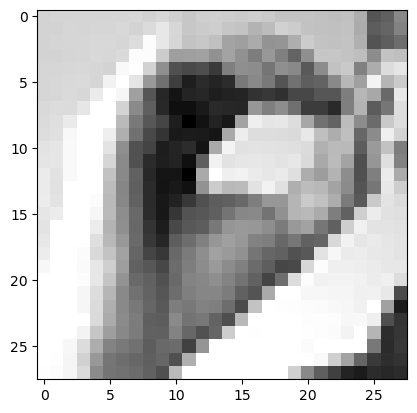

In [84]:
# Display as image
digit = 93# Change to choose new digit
a = X_train2[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image for digit: {}".format(y_train2[digit]))

<Figure size 640x480 with 0 Axes>

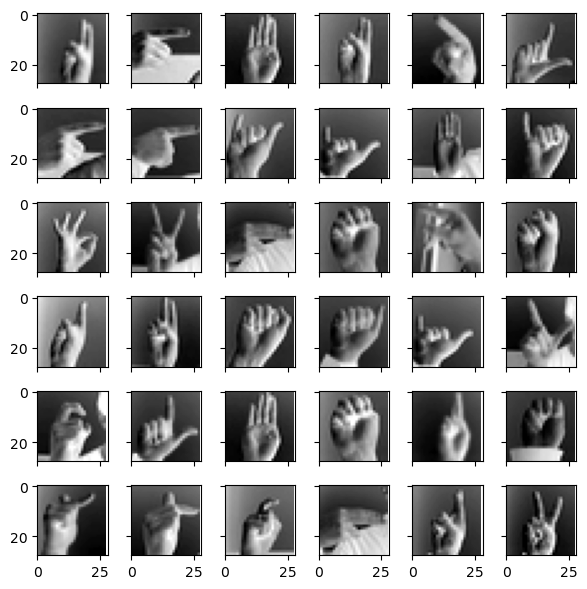

In [85]:
import random

ROWS = 6
random_indices = random.sample(range(X_train2.shape[0]), ROWS*ROWS)

sample_digits = X_train2[random_indices, :]

plt.clf()

fig, axes = plt.subplots(ROWS, ROWS, figsize=(ROWS, ROWS), sharex=True, sharey=True)

for i in range(ROWS*ROWS):
    subplot_row = i // ROWS
    subplot_col = i % ROWS
    ax = axes[subplot_row, subplot_col]

    plottable_image = np.reshape(sample_digits[i, :], (28, 28))
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_xbound([0, 28])

plt.tight_layout()
plt.show()

In [87]:
batch_size = 128
num_classes = 25
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
  X_train2 = X_train2.reshape(X_train2.shape[0], 1, img_rows, img_cols)
  X_test2 = X_test2.reshape(X_test2.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  X_train2 = X_train2.reshape(X_train2.shape[0], img_rows, img_cols, 1)
  X_test2 = X_test2.reshape(X_test2.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

X_train2 = X_train2.astype('float32')
X_test2 = X_test2.astype('float32')

# Normalize data
X_train2 /= 255
X_train2 /= 255

print(f"x_train.shape: {X_train2.shape}")
print("Training samples {}".format(X_train2.shape[0]))
print("Test samples {}".format(X_test2.shape[0]))

# Convert class vectors to binary class matrices
y_train2 = keras.utils.to_categorical(y_train2, num_classes)
y_test2 = keras.utils.to_categorical(y_test2, num_classes)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

x_train.shape: (27455, 28, 28, 1)
Training samples 27455
Test samples 7172


In [88]:
start_time = time.time()

model.fit(X_train2, y_train2,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(X_test2, y_test2))

score = model.evaluate(X_test2, y_test2, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

Epoch 1/12
215/215 - 29s - loss: 3.1969 - accuracy: 0.0448 - val_loss: 151.0690 - val_accuracy: 0.0229 - 29s/epoch - 137ms/step
Epoch 2/12
215/215 - 27s - loss: 3.1863 - accuracy: 0.0432 - val_loss: 209.1768 - val_accuracy: 0.0344 - 27s/epoch - 123ms/step
Epoch 3/12
215/215 - 28s - loss: 3.1846 - accuracy: 0.0437 - val_loss: 208.1932 - val_accuracy: 0.0229 - 28s/epoch - 128ms/step
Epoch 4/12
215/215 - 27s - loss: 3.1830 - accuracy: 0.0452 - val_loss: 212.7598 - val_accuracy: 0.0201 - 27s/epoch - 128ms/step
Epoch 5/12
215/215 - 28s - loss: 3.1803 - accuracy: 0.0462 - val_loss: 188.6841 - val_accuracy: 0.0229 - 28s/epoch - 130ms/step
Epoch 6/12
215/215 - 28s - loss: 3.1795 - accuracy: 0.0448 - val_loss: 213.4182 - val_accuracy: 0.0344 - 28s/epoch - 129ms/step
Epoch 7/12
215/215 - 28s - loss: 3.1801 - accuracy: 0.0434 - val_loss: 211.2788 - val_accuracy: 0.0268 - 28s/epoch - 128ms/step
Epoch 8/12
215/215 - 28s - loss: 3.1788 - accuracy: 0.0461 - val_loss: 205.2046 - val_accuracy: 0.0201 -


### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - dataset1 memiliki jumlah yang lebih banyak dari dataset2, sehingga waktu tiap epoch yang dihabiskan 2 kali lipat dari dataset2
    - Nilai akurasi dataset1 lebih tinggi karena class datanya hanya 10, sedangkan dataset2 memiliki 25 kelas. Ditambah dengan perbedaan jumlah data yang sangat jauh, tentu saja dataset1 memiliki hasil akurasi yang baik sekitar 0.9. Dataset2 hanya mendapatkan akurasi sekitar 0.4 karena distribusi yang buruk.
    - CNN merupakan metode machine learning yang dapat melakukan klasifikasi terhadap data unsupervised, sehingga pembuatan sentroid sangat penting untuk mengkelompokan data pada berbagai kelas.


In [4]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Ragil Muhamad Ramadhan
NIM: 		58511
Time-stamp:	2023-11-01 21:01:22.243672



### Save the notebook, then convert the notebook to html (by running the next code).

In [5]:
!jupyter nbconvert --to html "./IF540_EL_Laporan_08_58511_RagilMuhamadRamadhan.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540_EL_Laporan_08_58511_RagilMuhamadRamadhan.ipynb to html
[NbConvertApp] Writing 1076061 bytes to IF540_EL_Laporan_08_58511_RagilMuhamadRamadhan.html
